In [44]:
import pandas as pd
import spacy
import spacy.cli
import re
from datetime import datetime
import time
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv("tw_source.csv", encoding = "ISO-8859-1", names=["indice", "fecha", "query", "user", "tweet"])

In [31]:
data

,indice,fecha,query,user,tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Le quito el timezone a la fecha ya que no me va a servir.

In [32]:
data["fecha"]=data['fecha'].apply(lambda date_str: " ".join(date_str.split()[:-2]))

In [33]:
data

,indice,fecha,query,user,tweet
0,1467810369,Mon Apr 06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
4,2193601991,Tue Jun 16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
4,2193602064,Tue Jun 16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Convertir columna de fecha a formato fecha y extraer los usuarios de los tweets usando el @. Puede haber más de uno, así que devuelve una lista de todos los que encuentre.

In [34]:
data["fecha"]=data["fecha"].apply(lambda date_str: datetime.strptime(date_str, "%a %b %y %H:%M:%S"))

In [35]:
data["usuario"]=data["tweet"].apply(lambda x: re.findall(r'@[^ ]+', x))

In [36]:
data

,indice,fecha,query,user,tweet,usuario
0,1467810369,2006-04-01 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[@switchfoot]
0,1467810672,2006-04-01 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[]
0,1467810917,2006-04-01 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[@Kenichan]
0,1467811184,2006-04-01 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[]
0,1467811193,2006-04-01 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[@nationwideclass]
...,...,...,...,...,...,...
4,2193601966,2016-06-01 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,[]
4,2193601969,2016-06-01 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,[]
4,2193601991,2016-06-01 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,[]
4,2193602064,2016-06-01 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,[]


Calcular el length del tweet

In [9]:
data["length"]=data["tweet"].str.len()

In [10]:
data

,indice,fecha,query,user,tweet,usuario,length
0,1467810369,2006-04-01 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[@switchfoot],115
0,1467810672,2006-04-01 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[],111
0,1467810917,2006-04-01 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[@Kenichan],89
0,1467811184,2006-04-01 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[],47
0,1467811193,2006-04-01 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[@nationwideclass],111
...,...,...,...,...,...,...,...
4,2193601966,2016-06-01 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,[],56
4,2193601969,2016-06-01 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,[],78
4,2193601991,2016-06-01 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,[],57
4,2193602064,2016-06-01 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,[],65


Contar la cantidad de veces que los usuarios salen en la columna de usuario. Para esto uso counter.

In [11]:
usuarios=[usuario for sublist in data['usuario'].tolist() for usuario in sublist]

In [12]:
Counter(usuarios)

Counter({'@mileycyrus': 4324,
         '@tommcfly': 3841,
         '@ddlovato': 3356,
         '@Jonasbrothers': 1267,
         '@DavidArchie': 1227,
         '@jordanknight': 1108,
         '@DonnieWahlberg': 1086,
         '@JonathanRKnight': 1054,
         '@mitchelmusso': 1040,
         '@taylorswift13': 974,
         '@jonasbrothers': 959,
         '@selenagomez': 783,
         '@dougiemcfly': 782,
         '@aplusk': 607,
         '@peterfacinelli': 607,
         '@joeymcintyre': 563,
         '@gfalcone601': 539,
         '@Dannymcfly': 539,
         '@shaundiviney': 503,
         '@YoungQ': 503,
         '@kirstiealley': 425,
         '@stephenfry': 411,
         '@officialTila': 384,
         '@iamdiddy': 381,
         '@lilyroseallen': 377,
         '@ashleytisdale': 370,
         '@AlexAllTimeLow': 369,
         '@johncmayer': 368,
         '@TomFelton': 362,
         '@dannywood': 362,
         '@PerezHilton': 346,
         '@Pink': 340,
         '@andyclemmensen': 339,
   

Los 3 usuarios más mencionados son mileycyrus, tommcfly y ddlovato. Extraigo su parte del data en un dataframe separado para cada uno.

In [13]:
data_miley=data[data["usuario"].apply(lambda usuarios: any("mileycyrus" in usuario for usuario in usuarios))][["indice",
                                                                                "fecha", "tweet", "length"]]

In [14]:
data_tom=data[data["usuario"].apply(lambda usuarios: any("tommcfly" in usuario for usuario in usuarios))][["indice",
                                                                                "fecha", "tweet", "length"]]

In [15]:
data_demi=data[data["usuario"].apply(lambda usuarios: any("ddlovato" in usuario for usuario in usuarios))][["indice",
                                                                                "fecha", "tweet", "length"]]

Los tweets están en inglés así que uso este paquete

In [16]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
nlp=spacy.load("en_core_web_sm")

Defino todas las funciones de limpieza de los tweets

In [18]:
def Normalizacion(documentos):
    new_corpus=[]
    for doc in documentos:
        new_corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return new_corpus

def tokenizacion(documentos):
    new_corpus=[]
    for doc in documentos:
        new_corpus.append(nlp(doc))
    return new_corpus

def remove_stopwords(documentos):
    new_corpus=[]
    for doc in documentos:
        s=''
        for token in doc:
            if(token.is_stop==False):
                s=s+token.text+' '
        new_corpus.append(nlp(s.strip()))
    return new_corpus

def stemming_lemmating(documentos):
    new_corpus=[]
    for doc in documentos:
        s=''
        for token in doc:
            s=s+token.lemma_+' '
        new_corpus.append(s.strip())
    return new_corpus

def corpus_to_string(documentos):
    str_out=""
    for doc in documentos:
        str_out=str_out+doc+' '
    return str_out

In [39]:
def corpus_final(corpus):
    new_corpus=Normalizacion(corpus)
    new_corpus=tokenizacion(new_corpus)
    new_corpus=remove_stopwords(new_corpus)
    new_corpus=stemming_lemmating(new_corpus)
    new_corpus=corpus_to_string(new_corpus)
    return new_corpus

Aplicar las funciones a la columna de tweet

In [40]:
corpus_miley=corpus_final(data_miley["tweet"])

Esto es para el wordcloud, quito el usuario y sus nombres o sino están en las palabras principales. También quito todas las palabras que son de solo un caracter (estaban saliendo u, i, etc.).

In [74]:
corpus_miley_limpio=corpus_miley.replace("mileycyrus", "")
corpus_miley_limpio=corpus_miley_limpio.replace("miley", "")
corpus_miley_limpio=corpus_miley_limpio.replace("cyrus", "")
corpus_miley_limpio=corpus_miley_limpio.split()
corpus_miley_limpio=[p for p in corpus_miley_limpio if len(p)>=2]
corpus_miley_limpio=' '.join(corpus_miley_limpio)

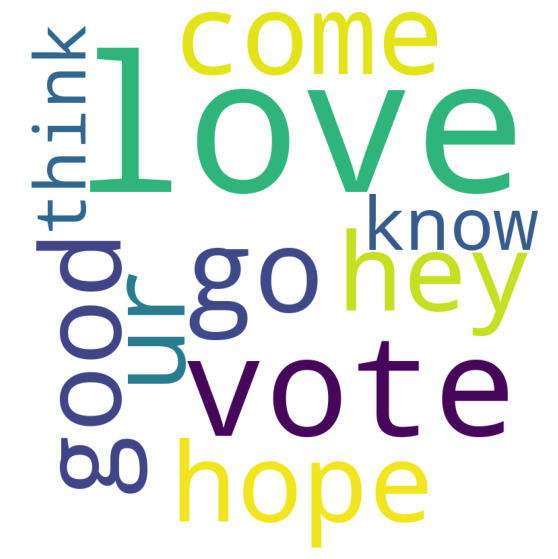

In [75]:
wordcloud_miley=WordCloud(width=800, height=800,
                background_color='white', max_words=10,
                min_font_size=10).generate(corpus_miley_limpio)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_miley)
plt.axis("off")
plt.show()

Parece que a Miley la citan porque le dicen que aman algo acerca de ella, le dicen que vaya a sus países y parece que hay algún tipo de votación y quiere que voten por ella.

In [60]:
corpus_tom=corpus_final(data_tom["tweet"])

In [76]:
corpus_tom_limpio=corpus_tom.replace("tommcfly", "")
corpus_tom_limpio=corpus_tom_limpio.replace("tom", "")
corpus_tom_limpio=corpus_tom_limpio.replace("mcfly", "")
corpus_tom_limpio=corpus_tom_limpio.split()
corpus_tom_limpio=[p for p in corpus_tom_limpio if len(p)>=2]
corpus_tom_limpio=' '.join(corpus_tom_limpio)

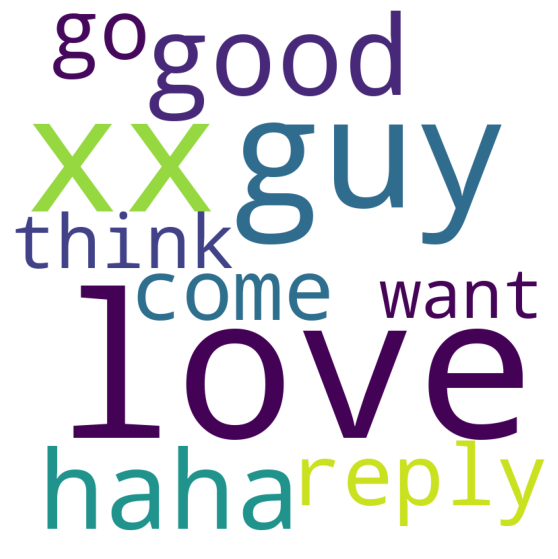

In [77]:
wordcloud_tom=WordCloud(width=800, height=800,
                background_color='white',max_words=10,
                min_font_size=10).generate(corpus_tom_limpio)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_tom)
plt.axis("off")
plt.show()

La razón por la cual mencionan a Tom parece ser más genérica, no se puede inferir mucho de las top 10 palabras, aunque también les gusta algo de él, quieren que responda y que vaya a algún lado.

In [66]:
corpus_demi=corpus_final(data_demi["tweet"])

In [81]:
corpus_demi_limpio=corpus_demi.replace("ddlovato", "")
corpus_demi_limpio=corpus_demi_limpio.replace("demi", "")
corpus_demi_limpio=corpus_demi_limpio.replace("lovato", "")
corpus_demi_limpio=corpus_demi_limpio.split()
corpus_demi_limpio=[p for p in corpus_demi_limpio if len(p)>=2]
corpus_demi_limpio=' '.join(corpus_demi_limpio)

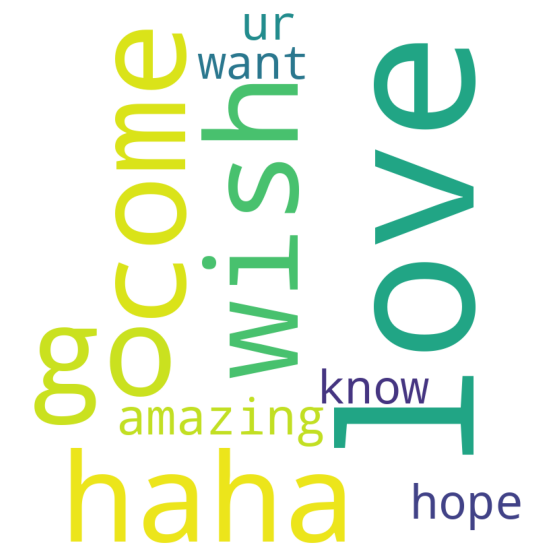

In [82]:
wordcloud_demi=WordCloud(width=800, height=800,
                background_color='white',max_words=10,
                min_font_size=10).generate(corpus_demi_limpio)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_demi)
plt.axis("off")
plt.show()

En el caso de Demi también les gusta algo de ella y quieren que vaya a algún lado. También desean que haga algo.